In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import re
import random
import operator
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif

from func import *

# inline plot
%matplotlib inline

In [2]:
#%load 'data/raw-twt2016-01-26-14/21/09.csv'
df = pd.read_csv("data/raw-twt2016-01-26-14-21-09.csv",sep='\t',error_bad_lines=False)
# df.head(5)
list(df.columns.values)

['Unnamed: 0',
 'created_at',
 'favorite_count',
 'favorited',
 'hashtags',
 'id',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'lang',
 'media',
 'place',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'text',
 'truncated',
 'urls',
 'user',
 'user_mentions']

Cleanin' the data

In [3]:
# Fill in blank hashtags
df["hashtags"].fillna('')

# Add some date/time things
df["created_at"] = pd.to_datetime(df["created_at"], errors='coerce')
df["day_of_week"] = df["created_at"].apply(lambda x: x.weekday())
df["day_of_month"] = df["created_at"].apply(lambda x: x.day)
df["month"] = df["created_at"].apply(lambda x: x.month)
df["time_of_day"] = df["created_at"].apply(lambda x: get_time_of_day(x))
df['in_reply_to_screen_name'].fillna(-1)
df['in_reply_to_status_id'].fillna(-1)
df['in_reply_to_user_id'].fillna(-1)
df['retweeted_status'].fillna(-1)
df['retweeted'].fillna(-1)
df['retweet_count'].fillna(-1)
df['favorite_count'].fillna(-1)
df["hashtags"].fillna('')
df["hashtags"] = df["hashtags"].apply(lambda x: str(x)[1:-1])
df.loc[df["hashtags"]=='a',"hashtags"] = ''

In [4]:
#Potentially remove, just cleaning for analysis sake
del df['Unnamed: 0']
del df['truncated']
del df['user_mentions']
del df['urls']
del df['source']
del df['lang']
del df['place']
del df['favorited']
del df['media']
del df['user']
# More likely to remove
del df['in_reply_to_status_id']
del df['in_reply_to_user_id']
del df['retweeted']
del df['retweeted_status']

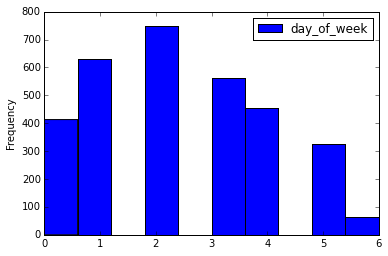

In [5]:
df.plot(x='created_at', y='day_of_week', kind='hist')
# fdf = df[["created_at","id","text","hashtags"]]
# str(fdf

Let's start getting some more detailed data from the trips as well

First, a word about the below code.
In the accompanying `func.py` there is a function called parse_train that returns a `pandas.Series` object. For some reason, when it's returned from a map or apply, it seems to get cast as a string. When applied to a list or a dataframe, this string gets turned into a single field in the row, OR divided into several rows, throwing the count off.

To get around this, I return the results of the parse_train function and then CAST it back to a series. This adds a weird 0 index, which I delete. I then fill in the plethora of NaNs and recombine it with the primary dataframe.

For context, previous iterations included
`df['topic_train'].apply(lambda x:parse_train(x))`
which would return a pd.Series object with `str` versions of the returned pd.Series from `parse_train`

In [6]:
# Pull out potential trains from both hashtags and text
df["topic_train"] = df["text"].apply(lambda x: check_hashtag(x))
#df["topic_train"] = df[""].apply(lambda x: check_hashtag(x))
# Let's then filter those train topics into details
# Btw this is jank as fuck.
events = pd.DataFrame([pd.Series(x) for x in df.apply(parse_train,axis=1)])
new
#del new.iloc[0]
#new.fillna('')
#df.combine_first(new)

KeyError: ('topic_train', u'occurred at index created_at')

In [ ]:

# pd.scatter_matrix(df,alpha=0.01,figsize=(15,15), diagonal='hist');


In [ ]:
df.plot(x='day_of_week', y='time_of_day', kind='hist')

In [ ]:
list(df.columns.values)

In [ ]:
rank_late(df.iloc[1])